In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('train.csv',parse_dates=['date_of_game'])

In [3]:
df.head()

,is_goal,match_event_id,location_x,location_y,remaining_min,power_of_shot1,knockout_match2,game_season,remaining_sec1,distance_of_shot1,...,lat_lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot,knockout_match1,remaining_sec2,distance_of_shot2
0,0,NaN,-49.0,NaN,7.0,3.0,0.0,2014-15,14.0,39.0,...,"46.667324, -94.419250",shot - 3,shot - 3,21400351,1610612747,38.20,3.0,0.0,29.2,38.400
1,0,505.0,-59.0,191.0,1.0,4.0,0.0,2002-03,9.0,39.0,...,"33.552026, -112.071667",shot - 48,NaN,20200471,1610612747,87.64,4.0,NaN,NaN,39.000
2,1,309.0,0.0,0.0,2.0,3.0,NaN,1997-98,58.0,20.0,...,"41.845137, -87.660450",shot - 39,NaN,29700335,1610612747,74.64,3.0,NaN,NaN,20.000
3,0,106.0,6.0,242.0,0.0,1.0,1.0,2007-08,21.0,44.0,...,"42.330507, -71.074655",shot - 50,NaN,40700406,1610612747,0.00,1.0,1.0,21.0,111.728
4,0,284.0,-120.0,82.0,9.0,3.0,1.0,2003-04,36.0,34.0,...,NaN,shot - 3,shot - 3,40300316,1610612747,9.00,NaN,1.0,36.0,34.000


In [4]:
df.shape #rows,columns

(20764, 27)

In [5]:
df.isnull().sum()#understand no. of missing values under each columns

is_goal                      0
match_event_id            1044
location_x                 954
location_y                1042
remaining_min             1043
power_of_shot1             240
knockout_match2            266
game_season               3919
remaining_sec1             213
distance_of_shot1         1069
area_of_shot              1011
shot_basics               1098
range_of_shot             1084
team_name                 1031
date_of_game              1041
home_away                 1019
shot_id_number            1049
lat_lng                   1068
type_of_shot                 0
type_of_combined_shot    10454
match_id                     0
team_id                      0
remaining_min.1           1051
power_of_shot             1028
knockout_match1           1034
remaining_sec2            1033
distance_of_shot2         1050
dtype: int64

In [6]:
#percentage of data missing

In [7]:
(df.isnull().sum()/len(df)*100).round(1)

is_goal                   0.0
match_event_id            5.0
location_x                4.6
location_y                5.0
remaining_min             5.0
power_of_shot1            1.2
knockout_match2           1.3
game_season              18.9
remaining_sec1            1.0
distance_of_shot1         5.1
area_of_shot              4.9
shot_basics               5.3
range_of_shot             5.2
team_name                 5.0
date_of_game              5.0
home_away                 4.9
shot_id_number            5.1
lat_lng                   5.1
type_of_shot              0.0
type_of_combined_shot    50.3
match_id                  0.0
team_id                   0.0
remaining_min.1           5.1
power_of_shot             5.0
knockout_match1           5.0
remaining_sec2            5.0
distance_of_shot2         5.1
dtype: float64

In [8]:
#Tabular report 
missing=pd.DataFrame(df.isnull().sum(),columns=['no_of_missing_value'])
missing

,no_of_missing_value
is_goal,0
match_event_id,1044
location_x,954
location_y,1042
remaining_min,1043
power_of_shot1,240
knockout_match2,266
game_season,3919
remaining_sec1,213
distance_of_shot1,1069


In [9]:
missing['Total_no_of_row']=len(df)

In [10]:
missing['percentage']=(df.isnull().sum()/len(df)*100).round(1)


In [11]:
missing.sort_values(by='percentage',ascending=False,inplace=True)

In [12]:
missing.head()

,no_of_missing_value,Total_no_of_row,percentage
type_of_combined_shot,10454,20764,50.3
game_season,3919,20764,18.9
shot_basics,1098,20764,5.3
range_of_shot,1084,20764,5.2
distance_of_shot2,1050,20764,5.1


In [13]:
missing.to_csv('missing_report.csv')


<AxesSubplot:xlabel='no_of_missing_value'>

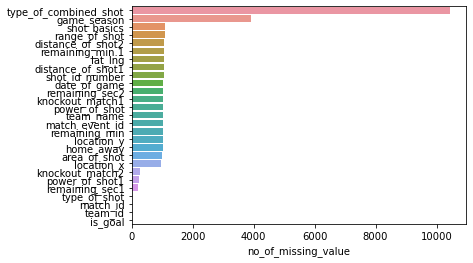

In [14]:
sns.barplot(y=missing.index,x='no_of_missing_value',data=missing)


In [15]:
#row wise missing

In [16]:
df.isnull().sum(axis=1).value_counts()

1    7000
2    6119
0    3337
3    3006
4     985
5     260
6      54
7       3
dtype: int64

In [17]:
missing_rows=df.isnull().sum(axis=1).value_counts()
missing_rows=pd.DataFrame(missing_rows,columns=['missing_sparsity'])
missing_rows.reset_index(inplace=True)

In [18]:
missing_rows['No_of_Features']=df.shape[1]

In [19]:
missing_rows.columns=['No_of feature_having_missing_val','missing_sparsity','No_of_Features']
missing_rows[['No_of_Features','No_of feature_having_missing_val','missing_sparsity']]


,No_of_Features,No_of feature_having_missing_val,missing_sparsity
0,27,1,7000
1,27,2,6119
2,27,0,3337
3,27,3,3006
4,27,4,985
5,27,5,260
6,27,6,54
7,27,7,3


In [20]:
missing_rows.to_csv('missing_rows.csv')

In [21]:
import missingno as msng

<AxesSubplot:>

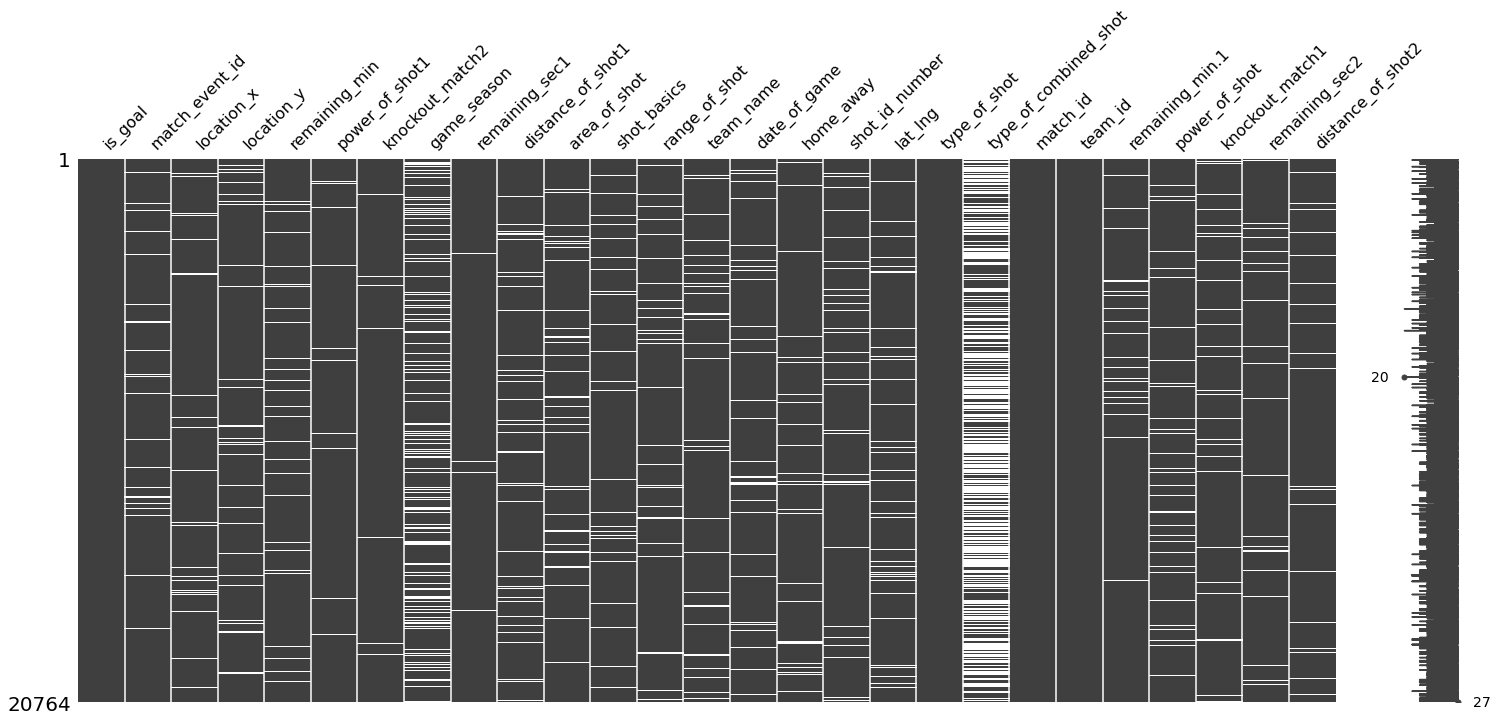

In [22]:
msng.matrix(df)#missing value is spread over entire dataset